In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
mnist = tf.keras.datasets.mnist

%matplotlib inline

In [18]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [19]:
x_train.shape

(60000, 28, 28)

In [20]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [21]:
x_train.shape

(60000, 28, 28, 1)

# 大名鼎鼎的LeNet

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6,(5,5),padding='same',input_shape=(28,28,1),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(16,(5,5),padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(120,(5,5),padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 16)        2416      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 120)         48120     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 120)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 3, 120)         0         
__________

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128,validation_split=0.25)
model.evaluate(x_test, y_test)

Train on 45000 samples, validate on 15000 samples
Epoch 1/5
45000/45000 [==============================] - 22s 499us/sample - loss: 0.3452 - acc: 0.8911 - val_loss: 0.0853 - val_acc: 0.9727
Epoch 2/5
45000/45000 [==============================] - 22s 490us/sample - loss: 0.0883 - acc: 0.9729 - val_loss: 0.0557 - val_acc: 0.9823
Epoch 3/5
45000/45000 [==============================] - 22s 489us/sample - loss: 0.0584 - acc: 0.9820 - val_loss: 0.0543 - val_acc: 0.9834
Epoch 4/5
45000/45000 [==============================] - 22s 489us/sample - loss: 0.0481 - acc: 0.9850 - val_loss: 0.0433 - val_acc: 0.9866
Epoch 5/5
10000/10000 [==============================] - 2s 226us/sample - loss: 0.0278 - acc: 0.9902


[0.02782724884937634, 0.9902]

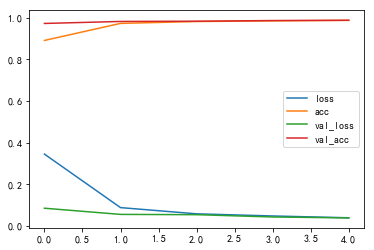

In [23]:
pd.DataFrame(history.history).plot()

# AlexNet

In [30]:
class LRN(tf.keras.layers.Layer):
    def build(self,input_shape):
        # lrn 没有需要定义的权重
        self.built=True
    def call(self,x):
        # 调用tensorflow库中的lrn方法
        return tf.nn.local_response_normalization(x,
                                                  depth_radius=2,
                                                  alpha=2e-05,
                                                  beta=0.75,
                                                  bias=1.0)
    def compute_output_shape(self,input_shape):
        # 返回修改后的形状（这里因为形状没有发生变化，直接返回即可）
        return input_shape

In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(11,11),padding='same',input_shape=(28,28,1),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    LRN(),
    tf.keras.layers.Conv2D(192,(5,5),padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    LRN(),
    tf.keras.layers.Conv2D(384,(3,3),padding='same',activation='relu'),
    tf.keras.layers.Conv2D(384,(3,3),padding='same',activation='relu'),
    tf.keras.layers.Conv2D(256,(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 64)        7808      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
lrn_2 (LRN)                  (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 192)       307392    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 192)         0         
_________________________________________________________________
lrn_3 (LRN)                  (None, 7, 7, 192)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 384)         663936    
__________

In [35]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128,validation_split=0.25)
model.evaluate(x_test, y_test)

Train on 45000 samples, validate on 15000 samples
Epoch 1/5
45000/45000 [==============================] - 744s 17ms/sample - loss: 0.4148 - acc: 0.8556 - val_loss: 0.0976 - val_acc: 0.9683
Epoch 2/5
45000/45000 [==============================] - 750s 17ms/sample - loss: 0.0667 - acc: 0.9805 - val_loss: 0.0606 - val_acc: 0.9819
Epoch 3/5
45000/45000 [==============================] - 737s 16ms/sample - loss: 0.0503 - acc: 0.9851 - val_loss: 0.0767 - val_acc: 0.9775
Epoch 4/5
45000/45000 [==============================] - 740s 16ms/sample - loss: 0.0397 - acc: 0.9880 - val_loss: 0.0459 - val_acc: 0.9869
Epoch 5/5
10000/10000 [==============================] - 35s 3ms/sample - loss: 0.0423 - acc: 0.9887


[0.04226039927528764, 0.9887]

In [ ]:
# 在mnist数据集上，alexnet的优势并不明显，但在部分其他任务上，alexnet将会有比较明显的优势

# 其他的一些经典神经网络架构

Resnet

In [ ]:
https://www.jianshu.com/p/acf4c3586031

In [66]:
import keras

In [121]:
class identity_bolck(tf.keras.layers.Layer):
    # 输入输出大小相同
    def __init__(self,nb_filter,kernel_size=3,**kwargs):
        super(identity_bolck,self).__init__(**kwargs)
        self.nb_filter=nb_filter
        self.kernel_size=kernel_size
    def build(self,input_shape):
        self.in_filter=input_shape[-1]
        self.built=True
    def call(self,input_tensor):
        k1,k2,k3 = self.nb_filter
        out = tf.keras.layers.Conv2D(k1,1,strides=(1,1))(input_tensor)
        out = tf.keras.layers.BatchNormalization()(out)
        out = tf.keras.layers.Activation('relu')(out)

        out = tf.keras.layers.Conv2D(k2,self.kernel_size,strides=(1,1),padding='same')(out)
        out = tf.keras.layers.BatchNormalization()(out)
        out = tf.keras.layers.Activation('relu')(out)

        out = tf.keras.layers.Conv2D(k3,1,strides=(1,1))(out)
        out = tf.keras.layers.BatchNormalization()(out)
        
        out = tf.keras.layers.add([out,input_tensor])
        out = tf.keras.layers.Activation('relu')(out)
        return out
    def compute_output_shape(self,input_shape):
        t=input_shape[:]
        t[3]=self.nb_filter[-1]
        return t
class conv_bolck(tf.keras.layers.Layer):
    # 输入输出大小相同
    def __init__(self,nb_filter,kernel_size=3,strides=1,**kwargs):
        super(conv_bolck,self).__init__(**kwargs)
        self.nb_filter=nb_filter
        self.kernel_size=kernel_size
        self.strides=strides
    def build(self,input_shape):
        self.in_filter=input_shape[-1]
        self.built=True
    def call(self,input_tensor):
        k1,k2,k3 = self.nb_filter
        out = tf.keras.layers.Conv2D(k1,1,strides=self.strides)(input_tensor)
        out = tf.keras.layers.BatchNormalization()(out)
        out = tf.keras.layers.Activation('relu')(out)

        out = tf.keras.layers.Conv2D(k2,self.kernel_size,padding='same')(out)
        out = tf.keras.layers.BatchNormalization()(out)
        out = tf.keras.layers.Activation('relu')(out)

        out = tf.keras.layers.Conv2D(k3,1,strides=(1,1))(out)
        out = tf.keras.layers.BatchNormalization()(out)
        
        x = tf.keras.layers.Conv2D(k3,kernel_size=1,strides=self.strides)(input_tensor)
        x = tf.keras.layers.BatchNormalization()(x)
        out = tf.keras.layers.add([out,x])
        out = tf.keras.layers.Activation('relu')(out)
        return out
    def compute_output_shape(self,input_shape):
        t=input_shape[:]
        t[1]=t[1]//self.strides
        t[2]=t[2]//self.strides
        t[3]=self.nb_filter[-1]
        
        return t

In [130]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(7,7),(2,2),padding='same',input_shape=(224,224,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D((3,3),strides=(2,2),padding='same'),
    conv_bolck([64,64,256],3),
    identity_bolck([64,64,256],3),
    identity_bolck([64,64,256],3),
    conv_bolck([128,128,512],3,2),
    identity_bolck([128,128,512],3),
    identity_bolck([128,128,512],3),
    identity_bolck([128,128,512],3),
    conv_bolck([256,256,1024],3,2),
    identity_bolck([256,256,1024],3),
    identity_bolck([256,256,1024],3),
    identity_bolck([256,256,1024],3),
    identity_bolck([256,256,1024],3),
    identity_bolck([256,256,1024],3),
    conv_bolck([512,512,2048],3,2),
    identity_bolck([512,512,2048],3),
    identity_bolck([512,512,2048],3),
    tf.keras.layers.AvgPool2D(pool_size=(7,7),strides=(1,1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1000),
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_371 (Conv2D)          (None, 112, 112, 64)      9472      
_________________________________________________________________
batch_normalization_v1_354 ( (None, 112, 112, 64)      256       
_________________________________________________________________
activation_315 (Activation)  (None, 112, 112, 64)      0         
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
conv_bolck_32 (conv_bolck)   (None, 56, 56, 256)       0         
_________________________________________________________________
identity_bolck_87 (identity_ (None, 56, 56, 256)       0         
_________________________________________________________________
identity_bolck_88 (identity_ (None, 56, 56, 256)       0         
__________